# Project Deliverables

## Part 2: Data Analysis

## Introduction

Now that we are done with data pre-processing which involves cleaning the data to make it analysis ready, it's time to do the analysis where we'll be performing the following steps.

1. Train-Test split,
2. Normalization/Standardization of numerical variables.
3. Checking for data imbalance.
4. Running the models
5. Evaluating the models based on scikit-learn metrics.
6. Fine tuning the models, using HyperParameter tuning, GridSearch, RandomSearch and evaluating them based on cross-validation.

Let's get into that and begin with importing required libraries, data from 'adult_data.csv' file into our environment.

## 0. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

Now that we've imported the required libraries, let's also import the data into this notebook which was pre-processed for our analysis and stored in a csv file.

## 1. Import data

In [3]:
adult_df = pd.read_csv("adult_data.csv")
adult_df.head(10)

,AGE,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,INCOME_ADJUSTED,WORK_CLASS_Federal-gov,WORK_CLASS_Local-gov,WORK_CLASS_Never-worked,WORK_CLASS_Private,WORK_CLASS_Self-emp-inc,...,EDUCATION_9th,EDUCATION_Assoc-acdm,EDUCATION_Assoc-voc,EDUCATION_Bachelors,EDUCATION_Doctorate,EDUCATION_HS-grad,EDUCATION_Masters,EDUCATION_Preschool,EDUCATION_Prof-school,EDUCATION_Some-college
0,39,2174,0,40,<=104K,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,50,0,0,13,<=104K,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,38,0,0,40,<=104K,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,53,0,0,40,<=104K,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,40,<=104K,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,37,0,0,40,<=104K,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6,49,0,0,16,<=104K,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,52,0,0,45,>104K,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,31,14084,0,50,>104K,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,42,5178,0,40,>104K,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Converting the target into a binary target variable

In [4]:
adult_df['INCOME_ADJUSTED'] = ['0' if value == '<=104K' else '1' for value in adult_df['INCOME_ADJUSTED']]

In [5]:
adult_df.head(20)

,AGE,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,INCOME_ADJUSTED,WORK_CLASS_Federal-gov,WORK_CLASS_Local-gov,WORK_CLASS_Never-worked,WORK_CLASS_Private,WORK_CLASS_Self-emp-inc,...,EDUCATION_9th,EDUCATION_Assoc-acdm,EDUCATION_Assoc-voc,EDUCATION_Bachelors,EDUCATION_Doctorate,EDUCATION_HS-grad,EDUCATION_Masters,EDUCATION_Preschool,EDUCATION_Prof-school,EDUCATION_Some-college
0,39,2174,0,40,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,50,0,0,13,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,38,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,53,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,40,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,37,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6,49,0,0,16,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,52,0,0,45,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,31,14084,0,50,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,42,5178,0,40,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
adult_df['INCOME_ADJUSTED'].unique()

array(['0', '1'], dtype=object)

We can convert this target into a category variable

In [7]:
adult_df['INCOME_ADJUSTED'] = adult_df['INCOME_ADJUSTED'].astype('category')

In [8]:
adult_df['INCOME_ADJUSTED'].unique()

['0', '1']
Categories (2, object): ['0', '1']

## 2. Train - Test Split

With a dataset of 48,842 rows and 43 columns, a relatively large dataset. In this case, a 60-40 train-test split is a reasonable starting point for machine learning tasks. It provides a substantial amount of data for training our models while still reserving a sizable test set for evaluating their performance.

In [10]:
X = adult_df.drop('INCOME_ADJUSTED', axis=1)  # Features
y = adult_df['INCOME_ADJUSTED']  # Target variable

# Split the dataset into a training set (60%) and a test set (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## 3. Data Imbalance

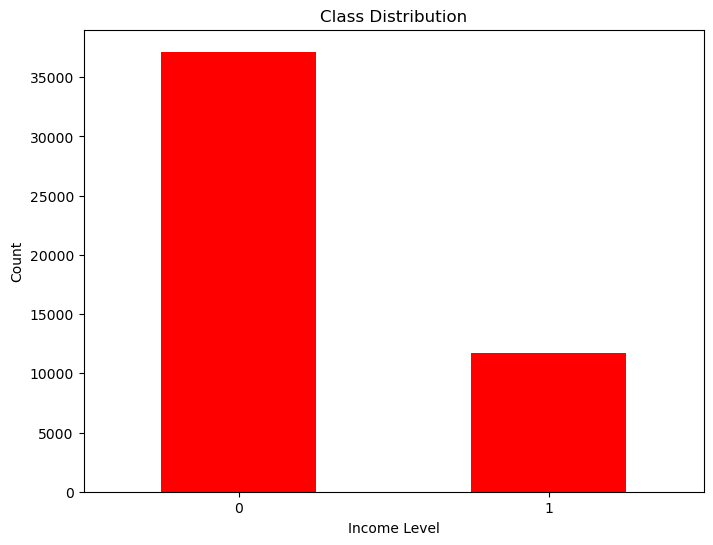

0    37155
1    11687
Name: INCOME_ADJUSTED, dtype: int64


In [11]:
class_distribution = adult_df['INCOME_ADJUSTED'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='red')
plt.title('Class Distribution')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Print class counts
print(class_distribution)

Here it shows a clear imbalance in our classes of the target variable, where the majority class(0) in this case occupies 76% of the data and minority class(1) occupies 24% of this data. We can do two things based on this imbalance if it is the true representation of the population we can proceed with our model fitting, if not representative then we have to oversample/undersample and then proceed with balanced dataset for our model training. Since the population is large compared to our sample size which is wholly 48842 this sample might not be diversed enough to represent the true distribution of population. So it is essential to address the imbalance in the classes for INCOME_ADJUSTED column. 

It is better to use Synthetic Minority Over-sampling Technique (SMOTE) which generates synthetic instances in the minority class by interpolating between existing instances. It creates synthetic data points to balance the distribution while reducing the risk of overfitting. We can also opt for other sampling strategies like Undersampling but we'll be losing significant amount of data or Random Oversampling where there is a risk of overfitting and of no significant variability introduced into the data as the sampling is done randomly for both random oversampling and undersampling, and lastly Adaptive Synthetic Sampling (ADASYN) which is computationally expensive compared to SMOTE but shows a slight improvement in the sampling by adaptively adjusting the balance by considering the level of difficulty for each instance.  So it's essential to consider starting with SMOTE as it generates synthetic instances in a more structured manner compared to random oversampling and ADASYN. Let's proceed with SMOTE and do our analysis. 

>- Additionally, when working with imbalanced datasets, one should also consider model evaluation metrics that are appropriate for imbalanced data, such as precision, recall, F1 score, and the area under the ROC curve (AUC). These metrics provide a more comprehensive view of our model's performance than accuracy.

In [12]:
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

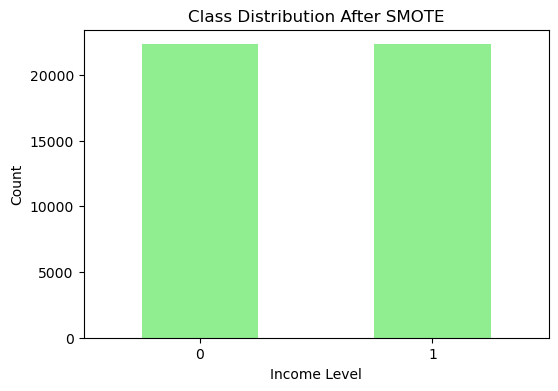

0    22329
1    22329
Name: INCOME_ADJUSTED, dtype: int64


In [13]:
class_distribution_resampled = y_train_res.value_counts()

# Plot the class distribution after SMOTE
plt.figure(figsize=(6, 4))
class_distribution_resampled.plot(kind='bar', color='lightgreen')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Print class counts after SMOTE
print(class_distribution_resampled)

Since we have addressed the imbalance in our data it is time to proceed for standardization of our data.

## 4. Standardization of Data

Some machine learning models, such as Support Vector Machines and Neural Networks(also KNN but not included for this analysis as it was used in many articles and papers analyzing this dataset which might produce redundant results), are sensitive to the scale of input features. Standardization can help ensure that all features have a similar scale, preventing some features from dominating others during the learning process. Since we have 'CAPITAL_GAIN', 'CAPITAL_LOSS' which are on the scale of thousands and 'HOURS_PER_WEEK' and 'AGE' on the scale of tens it is essential to consider scaling as all the columns are not on a single scale which might affect our prediction. So let's standardize the numerical columns of our dataset before proceeding for model fitting. 

In [14]:
numeric_cols = ['AGE','CAPITAL_GAIN','CAPITAL_LOSS','HOURS_PER_WEEK']

In [15]:
scaler = StandardScaler()

# Fit and transform the scaler on the numerical columns of X_train
X_train_res[numeric_cols] = scaler.fit_transform(X_train_res[numeric_cols])

# Transform the numerical columns of X_test using the same scaler
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

Now that we have scaled our data we are ready to our model selection

## 5. Model Selection

We are going to use these four models.

1. Logistic Regression: A simple and interpretable model that works well when the relationships in the data are primarily linear    or when you want to establish a baseline performance.
2. Random Forest: An ensemble model of decision trees that can capture complex relationships in the data. Less prone to over fitting compared to decision trees.   
3. Gradient Boosting (XGBoost): Powerful for capturing complex relationships. Can create strong ensemble models by combining weak learners.
4. Support Vector Machines (SVM): Effective for binary classification tasks, especially when the data has a clear margin of        separation or can be transformed to a higher-dimensional space.

The reason we didn't include neural networks in the list of our models is that they often come with a steeper learning curve and require more data and computational resources compared to traditional machine learning models like logistic regression, decision trees, random forests, and support vector machines. Additionally, neural networks may be more challenging to interpret and tune, which can be a consideration, especially if interpretability is important for our specific use case. Since, we doesn't have a sufficient amount of data(not true representative of a population and significantly less data compared to the true population) and computational resources neural networks can't be one of the best choices for binary classification tasks. Otherwise if we have all the above mentioned resources then Neural Networks can certainly be one of the best choices for binary classification tasks. They have been very successful in various applications, including image recognition, natural language processing, and more.

## 6. Model Fitting

### 6.1. Logistic Regression

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train_res, y_train_res)

LogisticRegression()

In [17]:
y_pred_lr = log_reg.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred_lr)

# Calculate precision for pos_label '1'
precision = precision_score(y_test, y_pred_lr, pos_label='1')

# Calculate recall for pos_label '1'
recall = recall_score(y_test, y_pred_lr, pos_label='1')

# Generate a classification report
class_report = classification_report(y_test, y_pred_lr, target_names=['0', '1'])

# F1 Score 
f1score = f1_score(y_test, y_pred_lr, pos_label='1')

# ROC AUC Curve
roc_auc_lr = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

# Print the metrics and classification report
print("Accuracy:", accuracy)
print("Precision (pos_label='1'):", precision)
print("Recall (pos_label='1'):", recall)
print("F1 Score (pos_label='1'):", f1score)
print("ROC AUC Score:", roc_auc_lr)
print("Classification Report:\n", class_report)

Accuracy: 0.8271484874852844
Precision (pos_label='1'): 0.6218487394957983
Recall (pos_label='1'): 0.7225642114200806
F1 Score (pos_label='1'): 0.668433971526755
ROC AUC Score: 0.8917990614284262
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88     14826
           1       0.62      0.72      0.67      4711

    accuracy                           0.83     19537
   macro avg       0.76      0.79      0.78     19537
weighted avg       0.84      0.83      0.83     19537



In summary, the Logistic Regression model has a moderate Precision, Recall, and F1 Score, suggesting that it is reasonably accurate in identifying individuals with incomes greater than $104K, but there may be room for improvement in balancing Precision and Recall.

###  6.2. Random Forest Classifier

In [19]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model to the training data
rf_classifier.fit(X_train_res, y_train_res)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf,pos_label = '1')
recall_rf = recall_score(y_test, y_pred_rf,pos_label = '1')
f1_rf = f1_score(y_test, y_pred_rf,pos_label = '1')
roc_auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

# Generate a classification report
classification_rep_rf = classification_report(y_test, y_pred_rf,target_names = ['0','1'])

# Print the results
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("ROC AUC Score:", roc_auc_rf)
print("Classification Report:\n", classification_rep_rf)


Accuracy: 0.8211086656088448
Precision: 0.6136023916292974
Recall: 0.6970919125451072
F1 Score: 0.6526880651893073
ROC AUC Score: 0.8767405433775446
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     14826
           1       0.61      0.70      0.65      4711

    accuracy                           0.82     19537
   macro avg       0.76      0.78      0.77     19537
weighted avg       0.83      0.82      0.82     19537



The same is the case for Random Forest where accuracy, recall and precision are lower than logistic regression, and can be improved with hyperparameter tuning.

### 6.3. Support Vector Machine

In [20]:
# Create an SVM model
svm_model = SVC(kernel='linear', random_state=1,probability = True)

# Fit the model to the training data
svm_model.fit(X_train_res, y_train_res)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label='1')
recall_svm = recall_score(y_test, y_pred_svm, pos_label='1')
f1_svm = f1_score(y_test, y_pred_svm, pos_label='1')
roc_auc_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("ROC AUC Score:", roc_auc_svm)

# Generate a classification report
classification_rep_svm = classification_report(y_test, y_pred_svm,target_names=['0', '1'])
print("Classification Report:\n", classification_rep_svm)

Accuracy: 0.8202385217791882
Precision: 0.6100201871903101
Recall: 0.7055826788367651
F1 Score: 0.6543307086614174
ROC AUC Score: 0.8825804435821196
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     14826
           1       0.61      0.71      0.65      4711

    accuracy                           0.82     19537
   macro avg       0.76      0.78      0.77     19537
weighted avg       0.83      0.82      0.82     19537



The recall is greater than Random Forest and less than logistic regression, and accuracy of all the 3 models is approximately same, where as when it comes to precision it is slightly better than the random forest model which can also be further imrpoved with hyperparameter tuning.

### 6.4. XGBoost

In [21]:
# Create a label encoder
label_encoder = LabelEncoder()

# Convert the target variable to integers
y_train_res = label_encoder.fit_transform(y_train_res)
y_test_xgb = label_encoder.transform(y_test)

# Create an XGBoost classifier
xgb_model = XGBClassifier(
    objective='binary:logistic',  # Binary classification objective
    max_depth=3,                # Maximum tree depth
    learning_rate=0.1,          # Learning rate
    n_estimators=100,           # Number of boosting rounds
    random_state=1
)

# Train the XGBoost model on the training data
xgb_model.fit(X_train_res, y_train_res)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
precision_xgb = precision_score(y_test_xgb, y_pred_xgb)
recall_xgb = recall_score(y_test_xgb, y_pred_xgb)
f1_xgb = f1_score(y_test_xgb, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test_xgb, xgb_model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
print("ROC AUC Score:", roc_auc_xgb)

# Generate a classification report
classification_rep_xgb = classification_report(y_test_xgb, y_pred_xgb)
print("Classification Report:\n", classification_rep_xgb)


Accuracy: 0.8105645697906536
Precision: 0.5749035894393355
Recall: 0.8227552536616429
F1 Score: 0.6768532262289356
ROC AUC Score: 0.9050942893984284
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87     14826
           1       0.57      0.82      0.68      4711

    accuracy                           0.81     19537
   macro avg       0.75      0.81      0.77     19537
weighted avg       0.85      0.81      0.82     19537



In summary, the XGBoost model has a relatively higher Recall compared to Precision, indicating that it is better at capturing individuals with incomes above $104K, the recall score of XGBoost is the highest among all the 4 models with default parameters. The F1 Score shows a balance between Precision and Recall. The ROC_AUC_Score is also good which accounts for 90%.

In [22]:
# Create lists for model names, precision, recall, and F1-score
model_names = ["Logistic Regression", "Support Vector Machine", "Random Forest", "XGBoost"]
accuracy_values = [accuracy,accuracy_svm,accuracy_rf,accuracy_xgb]
precision_values = [precision, precision_svm, precision_rf, precision_xgb]  # Replace with actual values
recall_values = [recall, recall_svm, recall_rf, recall_xgb]  # Replace with actual values
f1_score_values = [f1score, f1_svm, f1_rf, f1_xgb]  # Replace with actual values
roc_auc_scores = [roc_auc_lr,roc_auc_svm,roc_auc_rf,roc_auc_xgb]

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Model": model_names,
    "Precision": precision_values,
    "Recall": recall_values,
    "F1 Score": f1_score_values,
    "ROC AUC Score": roc_auc_scores
})

# Display the DataFrame
metrics_df

,Model,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.621849,0.722564,0.668434,0.891799
1,Support Vector Machine,0.610020,0.705583,0.654331,0.882580
2,Random Forest,0.613602,0.697092,0.652688,0.876741
3,XGBoost,0.574904,0.822755,0.676853,0.905094


Now that we are done running our models with their default parameters and obtained Scikit learn metrics, it's time to make the models perform better with hyperparameter tuning, gridsearch and randomsearch.

## 7. Hyperparameter tuning

Usually the strategy for Hyperparameter tuning our models involves RandomSearch and GridSearch where we begin with Random Search to gain insights into which hyperparameters may have a more significant impact. As we develop a deeper understanding of the hyperparameter landscape, enhance our search by utilizing Grid Search to identify the optimal combination. A recommended approach is to initiate the process with Random Search and, guided by the outcomes, employ Grid Search to fine-tune within areas that show promise. This is what we are going to do with all our models to improve their performance.

### 7.1. Hyperparameter tuning for Logistic Regression.

Since we've seen the performance of Logistic regression with it's default parameters, we believe there is still room for improvement so with hyperparameter tuning we look whether it is possible or not.Hyperparameter tuning for Logistic Regression is important for several reasons, even though Logistic Regression is a relatively simple linear model. Because Logistic Regression is a simple and interpretable model, hyperparameter tuning is essential to optimize its performance for various classification tasks. It allows us to control the balance between bias and variance, handle regularization, and customize the model to the characteristics of our data, ensuring that it performs at its best.

In [23]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logistic_reg = LogisticRegression(solver='liblinear')

# Define a random hyperparameter grid
random_param_grid = {'C': np.logspace(-4, 4, 100)}

random_search = RandomizedSearchCV(logistic_reg, random_param_grid, n_iter=200, cv=10, scoring='recall', random_state=1)
random_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters from Randomized Search
best_random_params = random_search.best_params_

In [24]:
grid_search = GridSearchCV(logistic_reg, param_grid, cv=10, scoring='recall')
grid_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters from Grid Search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [25]:
y_pred_lr_hp = best_model.predict(X_test)
y_pred_lr_hp = y_pred_lr_hp.astype(str)
accuracy_lr_hp = accuracy_score(y_test, y_pred_lr_hp)
precision_lr_hp = precision_score(y_test, y_pred_lr_hp,pos_label = '1')
recall_lr_hp = recall_score(y_test, y_pred_lr_hp,pos_label = '1')
f1_lr_hp = f1_score(y_test, y_pred_lr_hp,pos_label = '1')
roc_auc_lr_hp = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("Accuracy:", accuracy_lr_hp)
print("Precision:", precision_lr_hp)
print("Recall:", recall_lr_hp)
print("F1 Score:", f1_lr_hp)
print("ROC AUC Score:", roc_auc_lr_hp)

# Generate a classification report
classification_rep_lr_hp = classification_report(y_test, y_pred_lr_hp, target_names=['0', '1'])
print("Classification Report:\n", classification_rep_lr_hp)

Accuracy: 0.8210062957465322
Precision: 0.6036543715846995
Recall: 0.75037147102526
F1 Score: 0.6690640673795779
ROC AUC Score: 0.8904204000252788
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88     14826
           1       0.60      0.75      0.67      4711

    accuracy                           0.82     19537
   macro avg       0.76      0.80      0.77     19537
weighted avg       0.84      0.82      0.83     19537



### 7.2. Hyperparameter tuning for Random Forest.

Hyperparameter tuning is necessary for Random Forest, as it is for any machine learning algorithm, because it allows us to find the best combination of hyperparameters to optimize the model's performance. Even though Random Forest is an ensemble method that combines multiple decision trees, there are still hyperparameters that need to be set to achieve the best results.So, while Random Forest is an ensemble method that combines multiple decision trees, hyperparameter tuning is essential to fine-tune the behavior of these individual trees and the ensemble as a whole. It helps ensure that the model is well-balanced in terms of bias and variance, is computationally efficient, and delivers the best possible performance for your specific problem.

In [26]:
random_param_grid = {
    'n_estimators': np.arange(50, 1000, 50),
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_forest = RandomForestClassifier()

random_search = RandomizedSearchCV(random_forest, random_param_grid, n_iter=200, cv=10, scoring='recall', random_state=1)
random_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters from Randomized Search
best_random_params = random_search.best_params_

In [27]:
param_grid = {
    'n_estimators': [best_random_params['n_estimators']],
    'max_features': [best_random_params['max_features']],
    'max_depth': [best_random_params['max_depth']],
    'min_samples_split': [best_random_params['min_samples_split']],
    'min_samples_leaf': [best_random_params['min_samples_leaf']],
    'bootstrap': [best_random_params['bootstrap']]
}

In [28]:
grid_search = GridSearchCV(random_forest, param_grid, cv=10, scoring='recall')
grid_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters from Grid Search
best_params = grid_search.best_params_
best_model_rf = grid_search.best_estimator_

In [31]:
y_pred_rf_hp = best_model_rf.predict(X_test)
y_pred_rf_hp = y_pred_rf_hp.astype(str)
accuracy_rf_hp = accuracy_score(y_test, y_pred_rf_hp)
precision_rf_hp = precision_score(y_test, y_pred_rf_hp,pos_label = '1')
recall_rf_hp = recall_score(y_test, y_pred_rf_hp,pos_label = '1')
f1_rf_hp = f1_score(y_test, y_pred_rf_hp,pos_label = '1')
roc_auc_rf_hp = roc_auc_score(y_test, best_model_rf.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("Accuracy:", accuracy_rf_hp)
print("Precision:", precision_rf_hp)
print("Recall:", recall_rf_hp)
print("F1 Score:", f1_rf_hp)
print("ROC AUC Score:", roc_auc_rf_hp)

# Generate a classification report
classification_rep_rf_hp = classification_report(y_test, y_pred_rf_hp, target_names=['0', '1'])
print("Classification Report:\n", classification_rep_rf_hp)

Accuracy: 0.8278650765214721
Precision: 0.6082904884318766
Recall: 0.8036510295054129
F1 Score: 0.6924554183813443
ROC AUC Score: 0.9066170120629187
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88     14826
           1       0.61      0.80      0.69      4711

    accuracy                           0.83     19537
   macro avg       0.77      0.82      0.79     19537
weighted avg       0.85      0.83      0.84     19537



### 7.3. Hyperparameter tuning for Support Vector Machine(SVM).

Hyperparameter tuning is essential for Support Vector Machines (SVM) to optimize their performance, improve generalization, and ensure that the model is well-suited for a specific problem and dataset as the choice of the right hyperparameters can significantly impact the model's accuracy and generalization ability.

In [ ]:
random_param_grid = {
    'C': np.logspace(-3, 3, 100),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 100)),
    'coef0': np.linspace(-1, 1, 100),
    'shrinking': [True, False],
    'probability': [True, False],
    'class_weight': [None, 'balanced']
}
svm_model_hp = SVC()

random_search = RandomizedSearchCV(svm_model_hp, random_param_grid, n_iter=200, cv=10, scoring='recall', random_state=1)
random_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters from Randomized Search
best_random_params = random_search.best_params_

In [ ]:
param_grid = {
    'C': [best_random_params['C']],
    'kernel': [best_random_params['kernel']],
    'degree': [best_random_params['degree']],
    'gamma': [best_random_params['gamma']],
    'coef0': [best_random_params['coef0']],
    'shrinking': [best_random_params['shrinking']],
    'probability': [best_random_params['probability']],
    'class_weight': [best_random_params['class_weight']]
}
grid_search = GridSearchCV(svm_model_hp, param_grid, cv=10, scoring='recall')
grid_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters from Grid Search
best_params = grid_search.best_params_
best_model_svm = grid_search.best_estimator_

In [ ]:
y_pred_svm_hp = best_model_svm.predict(X_test)
y_pred_svm_hp = y_pred_svm_hp.astype(str)
accuracy_svm_hp = accuracy_score(y_test, y_pred_svm_hp)
precision_svm_hp = precision_score(y_test, y_pred_svm_hp,pos_label = '1')
recall_svm_hp = recall_score(y_test, y_pred_svm_hp,pos_label = '1')
f1_svm_hp = f1_score(y_test, y_pred_svm_hp,pos_label = '1')
roc_auc_svm_hp = roc_auc_score(y_test, best_model_svm.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("Accuracy:", accuracy_svm_hp)
print("Precision:", precision_svm_hp)
print("Recall:", recall_svm_hp)
print("F1 Score:", f1_svm_hp)
print("ROC AUC Score:", roc_auc_svm_hp)

# Generate a classification report
classification_rep_svm_hp = classification_report(y_test, y_pred_svm_hp, target_names=['0', '1'])
print("Classification Report:\n", classification_rep_svm_hp)

As the computational cost will be high, we didn't perform hyperparameter tuning for SVM.

### 7.4. Hyperparameter tuning for XGBoost.

Hyperparameter tuning is important for XGBoost (Extreme Gradient Boosting) to achieve the best possible model performance, control overfitting, balance the bias-variance trade-off, and tailor the model to the specific characteristics of our dataset. It allows us to extract the maximum predictive power from the XGBoost algorithm.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2],
}
xgb_model_hp = XGBClassifier()
random_search = RandomizedSearchCV(xgb_model_hp, random_param_grid, n_iter=200, scoring='recall', cv=10, random_state=1)
random_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters from Randomized Search
best_random_params = random_search.best_params_

In [ ]:
param_grid = {
    'n_estimators': [best_random_params['n_estimators']],
    'learning_rate': [best_random_params['learning_rate']],
    'max_depth': [best_random_params['max_depth']],
   
}

grid_search = GridSearchCV(xgb_model_hp, param_grid, cv=10, scoring='recall')
grid_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters from Grid Search
best_params = grid_search.best_params_
best_model_xgb = grid_search.best_estimator_

In [ ]:
y_pred_xgb_hp = best_model_xgb.predict(X_test)
accuracy_xgb_hp = accuracy_score(y_test_xgb, y_pred_xgb_hp)
precision_xgb_hp = precision_score(y_test_xgb, y_pred_xgb_hp,pos_label = '1')
recall_xgb_hp = recall_score(y_test_xgb, y_pred_xgb_hp,pos_label = '1')
f1_xgb_hp = f1_score(y_test_xgb, y_pred_xgb_hp,pos_label = '1')
roc_auc_xgb_hp = roc_auc_score(y_test_xgb, best_model_xgb.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("Accuracy:", accuracy_xgb_hp)
print("Precision:", precision_xgb_hp)
print("Recall:", recall_xgb_hp)
print("F1 Score:", f1_xgb_hp)
print("ROC AUC Score:", roc_auc_xgb_hp)

# Generate a classification report
classification_rep_xgb_hp = classification_report(y_test_xgb, y_pred_xgb_hp, target_names=['0', '1'])
print("Classification Report:\n", classification_rep_xgb_hp)

Ran it in next file, so including pictures of the result here.

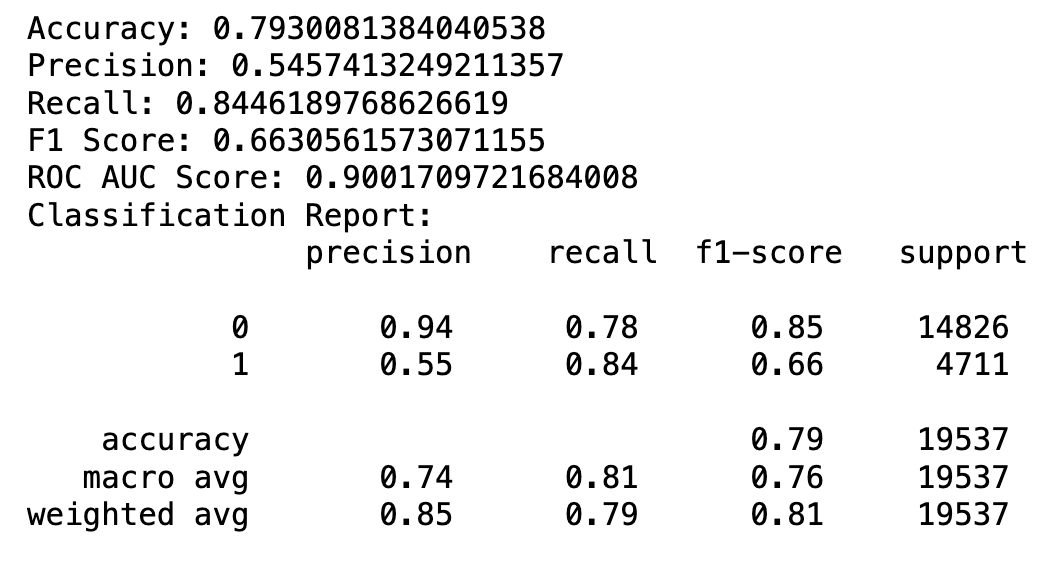

## 8. Conclusion 

To determine the most appropriate evaluation metric for the given problem statement, where a retail company is aiming to create a data-driven segmentation strategy based on income categories, it's important to consider the specific business goals. In this context, where the primary objective is effective customer segmentation for marketing and sales strategies, the Recall metric is arguably more relevant and valuable compared to other metrics like Accuracy, Precision, or F1-Score.

Conclusions:

Random Forest appears to be the best-performing model in terms of Recall (80.36%), indicating its ability to effectively identify high-income and low-income customer segments.

High Recall means that the model can capture a substantial portion of actual high-income and low-income customers, reducing the risk of misclassifying valuable segments.

Recall is crucial for the retail company because it directly impacts the effectiveness of their targeted marketing efforts. A high Recall ensures that marketing strategies are reaching the intended income-based customer segments.

While Logistic Regression and XGBoost also show respectable Recall scores, Random Forest seems to be the most suitable choice for this specific business scenario, as it balances Recall with other metrics, such as Precision, reasonably well.

In summary, the retail company should consider adopting the Random Forest model to create an effective data-driven segmentation strategy based on income categories, with a focus on optimizing Recall. This should lead to more accurate targeting of high-income and low-income customer segments, ultimately improving marketing and sales strategies and potentially boosting revenue.